In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Function, diff, integrate, exp, lambdify

# Define the symbols
theta, x, omega, s, C, lambda_expr = symbols('theta x omega s C lambda')
theta = Function('theta')(x)

In [2]:
theta

theta(x)

In [3]:
x

x

In [4]:
omega

omega

In [5]:
s

s

In [6]:
C

C

In [7]:
lambda_expr

lambda

In [8]:
ode=diff(theta,x, 2) - (omega **2 ) * theta

In [9]:
ode

-omega**2*theta(x) + Derivative(theta(x), (x, 2))

In [10]:
lambda_expr=s-x

In [11]:
lambda_expr

s - x

In [12]:
theta0=C+(1-C)*(x**2)

In [13]:
theta0

C + x**2*(1 - C)

In [14]:
theta1=theta0+integrate(
    lambda_expr * (diff(theta0,x, 2) - (omega **2 ) * theta0),
    (s, 0, x)
)

In [15]:
theta1

C + x**2*(1 - C) + x**2*(C*omega**2*x**2/2 - C*omega**2/2 - C - omega**2*x**2/2 + 1) + x*(-C*omega**2*x**3 + C*omega**2*x + 2*C*x + omega**2*x**3 - 2*x)

In [16]:
def vim( iterations, x, omega, s, C, lambda_expr):
    theta=C+(1-C)*(x**2)
    for i in range(iterations):
        theta=theta+integrate(
                lambda_expr * (diff(theta,x, 2) - (omega **2 ) * theta),
                    (s, 0, x)
                        )
    return theta
        

In [17]:
theta1=vim(1,x,omega,s,C,lambda_expr)

In [18]:
theta1

C + x**2*(1 - C) + x**2*(C*omega**2*x**2/2 - C*omega**2/2 - C - omega**2*x**2/2 + 1) + x*(-C*omega**2*x**3 + C*omega**2*x + 2*C*x + omega**2*x**3 - 2*x)

In [19]:
theta2=vim(2,x,omega,s,C,lambda_expr)

In [20]:
theta2

C + x**2*(1 - C) + x**2*(C*omega**2*x**2/2 - C*omega**2/2 - C - omega**2*x**2/2 + 1) + x**2*(C*omega**4*x**4/4 - C*omega**4*x**2/4 - 3*C*omega**2*x**2 - omega**4*x**4/4 + 3*omega**2*x**2) + x*(-C*omega**2*x**3 + C*omega**2*x + 2*C*x + omega**2*x**3 - 2*x) + x*(-C*omega**4*x**5/2 + C*omega**4*x**3/2 + 6*C*omega**2*x**3 + omega**4*x**5/2 - 6*omega**2*x**3)

In [21]:
theta3=vim(3,x,omega=2,s=s,C=0.9,lambda_expr=lambda_expr)

In [22]:
theta3

x**2*(-0.2*x**2 - 1.7) + x**2*(-0.4*x**4 - 2.4*x**2 + 2.22044604925031e-16) + x**2*(-0.8*x**6 + 0.799999999999999*x**4 + 12.0*x**2) + 0.1*x**2 + x*(0.4*x**3 + 3.4*x) + x*(0.8*x**5 + 4.8*x**3 - 4.44089209850063e-16*x) + x*(1.6*x**7 - 1.6*x**5 - 24.0*x**3) + 0.9

In [23]:
type(theta3)

sympy.core.add.Add

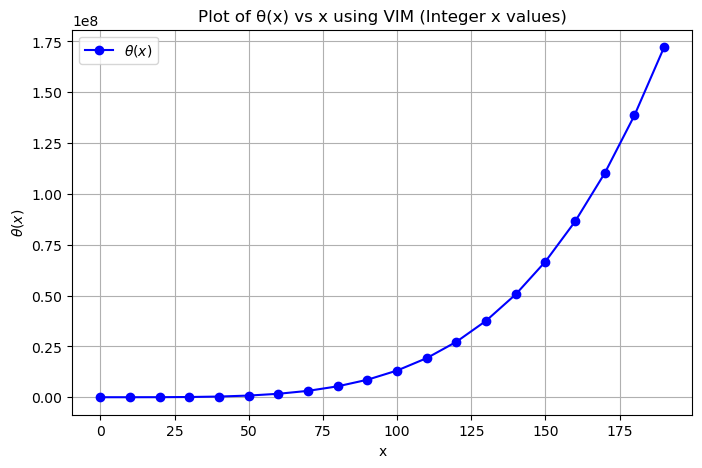

In [27]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Define symbolic variable
x_sym = sp.Symbol('x')  # Ensure x is symbolic for differentiation

# Define the Variational Iteration Method function
def vim(iterations, x_val, omega, s, C, lambda_expr):
    theta = C + (1 - C) * (x_sym**2)  # Ensure x_sym is used symbolically

    for i in range(iterations):
        correction = sp.integrate(
            lambda_expr * (sp.diff(theta, x_sym, 2) - (omega ** 2) * theta),
            (x_sym, 0, x_sym)  # Ensure integration is done symbolically
        )
        theta += correction

    # Convert symbolic result to a numerical function
    theta_func = sp.lambdify(x_sym, theta, "numpy")
    
    # Evaluate theta for numerical x values
    return theta_func(x_val)

# Define parameters
s = 2  
C = 0.9
lambda_expr = 1  # Adjust based on the actual equation
omega = 2

# Generate integer x values
x = np.arange(0, 200, 10, dtype=int)

# Compute theta(x) values
theta_values = np.array([vim(2, i, omega, s, C, lambda_expr) for i in x])

# Plot theta(x) vs x
plt.figure(figsize=(8, 5))
plt.plot(x, theta_values, label=r'$\theta(x)$', color='b', marker='o')
plt.xlabel("x")
plt.ylabel(r'$\theta(x)$')
plt.title("Plot of θ(x) vs x using VIM (Integer x values)")
plt.legend()
plt.grid(True)
plt.show()
